<a href="https://colab.research.google.com/github/kelger/Malicious_URL_Detection_ML/blob/main/Malicious_URL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re

import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn import tree

from colorama import Fore #Colorama is a module to color the python outputs

from urllib.parse import urlparse

# This module defines a standard interface to break Uniform Resource Locator (URL)

#strings up in components (addressing scheme, network location, path etc.),

# to combine the components back into a URL string,

# and to convert a "relative URL" to an absolute URL given a "base URL."

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import SGDClassifier

from sklearn.naive_bayes import GaussianNB

from tld import get_tld, is_tld

In [ ]:
pip install colorama


In [ ]:
#adding File
data=pd.read_csv('malicious_phish.csv')

In [ ]:
data.head(25)

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign
8,http://www.pashminaonline.com/pure-pashminas,defacement
9,allmusic.com/album/crazy-from-the-heat-r16990,benign


In [ ]:
#Data Analysis
#meta data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


In [ ]:
#checking null cell
data.isnull().sum()

,0
url,0
type,0


In [ ]:
#we gonna remove NAN value from the data frame
data = data.dropna()

In [ ]:
#type based information
count = data.type.value_counts()
count

,count
type,
benign,428103
defacement,96457
phishing,94111
malware,32520


Text(0, 0.5, 'count')

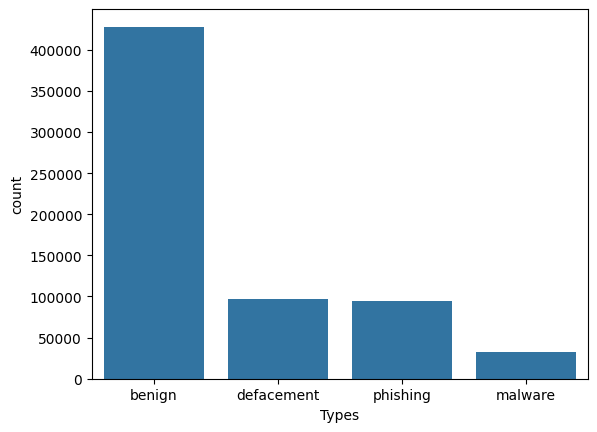

In [ ]:
x = count.index
x
sns.barplot(x=count.index,y=count)
plt.xlabel('Types')
plt.ylabel('count')

In [ ]:
data['url']=data['url'].replace('www.','',regex=True)
data.head(15)

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://garage-pirenne.be/index.php?option=com_...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign
8,http://pashminaonline.com/pure-pashminas,defacement
9,allmusic.com/album/crazy-from-the-heat-r16990,benign


In [ ]:

rem = {"Category":{"phishing":2,"malware":3,"benign":0,"defacement":1}}
data['Category'] = data['type']
data = data.replace(rem)
data.head(10)


<ipython-input-14-e8e05f9847fa>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace(rem)


,url,type,Category
0,br-icloud.com.br,phishing,2
1,mp3raid.com/music/krizz_kaliko.html,benign,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0
8,http://pashminaonline.com/pure-pashminas,defacement,1
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0


In [ ]:
#Feature Extraction and Feature Selection
#addin a length Cloumn

data['url_len'] = data['url'].apply(lambda x:len(str(x)))
data.head(10)

,url,type,Category,url_len
0,br-icloud.com.br,phishing,2,16
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0,118
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,45
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0,46
8,http://pashminaonline.com/pure-pashminas,defacement,1,40
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0,45


In [ ]:
#extracting tld from url
def process_tld(url):
  try:
    res = get_tld(url, as_object= True, fail_silently=False,fix_protocol=True)
    pri_domain = res.parsed_url.netloc
  except:
    pri_domain = None
  return pri_domain

data['domain'] = data['url'].apply(lambda x: process_tld(x) )
data.head(10)



,url,type,Category,url_len,domain
0,br-icloud.com.br,phishing,2,16,br-icloud.com.br
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0,118,buzzfil.net
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,45,espn.go.com
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0,46,yourbittorrent.com
8,http://pashminaonline.com/pure-pashminas,defacement,1,40,pashminaonline.com
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0,45,allmusic.com


In [ ]:
#feature extraction on the basis of Symbol
feature = ['@','?', '-', '=', '.', '#', '%', '+', '$','!', ',','//']

for a in feature:
  data[a] = data['url'].apply(lambda i: i.count(a))

data.head()

,url,type,Category,url_len,domain,@,?,-,=,.,#,%,+,$,!,",",//
0,br-icloud.com.br,phishing,2,16,br-icloud.com.br,0,0,1,0,2,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,0,0,0,0,2,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,0,0,0,0,2,0,0,0,0,0,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,0,1,1,4,2,0,0,0,0,0,0,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,0,1,1,3,2,0,0,0,0,0,0,1


In [ ]:
#abnormal link detection using pre-defined rules
def abnormal_url(url):

  hostname = urlparse(url).hostname
  hostname = str(hostname)

  match = re.search(hostname, url)
  if match:
# print match.group()
    return 1
  else:
# print 'No matching pattern found'
    return 0

data['abnormal_url'] = data['url'].apply(lambda i: abnormal_url(i))

data.head(10)

,url,type,Category,url_len,domain,@,?,-,=,.,#,%,+,$,!,",",//,abnormal_url
0,br-icloud.com.br,phishing,2,16,br-icloud.com.br,0,0,1,0,2,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,0,0,0,0,2,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,0,0,0,0,2,0,0,0,0,0,0,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,0,1,1,4,2,0,0,0,0,0,0,1,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,0,1,1,3,2,0,0,0,0,0,0,1,1
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0,118,buzzfil.net,0,0,16,0,2,0,0,0,0,0,0,1,1
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,45,espn.go.com,0,0,1,0,2,0,0,0,0,0,0,0,0
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0,46,yourbittorrent.com,0,1,2,1,1,0,0,0,0,0,0,0,0
8,http://pashminaonline.com/pure-pashminas,defacement,1,40,pashminaonline.com,0,0,1,0,1,0,0,0,0,0,0,1,1
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0,45,allmusic.com,0,0,4,0,1,0,0,0,0,0,0,0,0


In [ ]:
#Https link detection

def httpSecure(url):
  htp = urlparse(url).scheme

  match = str(htp)
  if match=='https':
    #print match.group()
    return 1
  else:
    #print 'No Matching pattern found'
    return 0

data['https'] = data['url'].apply(lambda i: httpSecure(i))
data.head(20)

,url,type,Category,url_len,domain,@,?,-,=,.,#,%,+,$,!,",",//,abnormal_url,https
0,br-icloud.com.br,phishing,2,16,br-icloud.com.br,0,0,1,0,2,0,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,0,0,0,0,2,0,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,0,0,0,0,2,0,0,0,0,0,0,0,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,0,1,1,4,2,0,0,0,0,0,0,1,1,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,0,1,1,3,2,0,0,0,0,0,0,1,1,0
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0,118,buzzfil.net,0,0,16,0,2,0,0,0,0,0,0,1,1,0
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,45,espn.go.com,0,0,1,0,2,0,0,0,0,0,0,0,0,0
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0,46,yourbittorrent.com,0,1,2,1,1,0,0,0,0,0,0,0,0,0
8,http://pashminaonline.com/pure-pashminas,defacement,1,40,pashminaonline.com,0,0,1,0,1,0,0,0,0,0,0,1,1,0
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0,45,allmusic.com,0,0,4,0,1,0,0,0,0,0,0,0,0,0


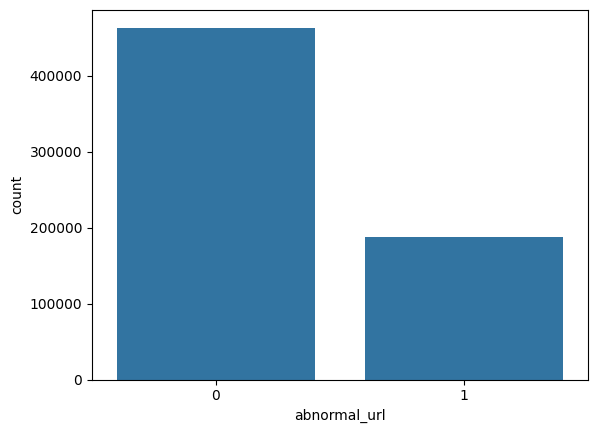

In [ ]:
#visualization
sns.countplot(x='abnormal_url',data=data);


In [ ]:
#no of digits
def digit_count(url):
  digits=0
  for i in url:
    if i.isnumeric():
      digits = digits + 1
      return digits

data['digits']= data['url'].apply(lambda i: digit_count(i))


In [ ]:
#no of letters
def letter_count(url):
  letters = 0
  for i in url:
    if i.isalpha():
      letters = letters + 1
  return letters

data['letters']= data['url'].apply(lambda i: letter_count(i))

In [ ]:
#checking presence of shortening service
def Shortining_Service(url):
  match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adataset\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',url)
  if match:
    return 1
  else:
    return 0

data['Shortining_Service']= data['url'].apply(lambda x: Shortining_Service(x))

In [ ]:
#Checking presence of IP address
def having_ip_address(url):
  match = re.search('(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}',url)
  if match:
    return 1
  else:
    return 0

data['having_ip_address']= data['url'].apply(lambda i: having_ip_address(i))





In [ ]:
#view the final outcome of dataframe
data.head(10)
#data.isnull().sum()

,url,type,Category,url_len,domain,@,?,-,=,.,...,$,!,",",//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address
0,br-icloud.com.br,phishing,2,16,br-icloud.com.br,0,0,1,0,2,...,0,0,0,0,0,0,NaN,13,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,0,0,0,0,2,...,0,0,0,0,0,0,1.0,29,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,0,0,0,0,2,...,0,0,0,0,0,0,1.0,25,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,0,1,1,4,2,...,0,0,0,1,1,0,1.0,60,0,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,0,1,1,3,2,...,0,0,0,1,1,0,1.0,199,0,0
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0,118,buzzfil.net,0,0,16,0,2,...,0,0,0,1,1,0,1.0,93,0,0
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,45,espn.go.com,0,0,1,0,2,...,0,0,0,0,0,0,1.0,31,0,0
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0,46,yourbittorrent.com,0,1,2,1,1,...,0,0,0,0,0,0,NaN,40,1,0
8,http://pashminaonline.com/pure-pashminas,defacement,1,40,pashminaonline.com,0,0,1,0,1,...,0,0,0,1,1,0,NaN,34,0,0
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0,45,allmusic.com,0,0,4,0,1,...,0,0,0,0,0,0,1.0,33,0,0


In [ ]:
data

,url,type,Category,url_len,domain,@,?,-,=,.,...,$,!,",",//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address
0,br-icloud.com.br,phishing,2,16,br-icloud.com.br,0,0,1,0,2,...,0,0,0,0,0,0,NaN,13,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,0,0,0,0,2,...,0,0,0,0,0,0,1.0,29,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,0,0,0,0,2,...,0,0,0,0,0,0,1.0,25,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,0,1,1,4,2,...,0,0,0,1,1,0,1.0,60,0,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,0,1,1,3,2,...,0,0,0,1,1,0,1.0,199,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,2,39,xbox360.ign.com,0,0,0,0,3,...,0,0,0,0,0,0,1.0,21,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,2,44,games.teamxbox.com,0,0,2,0,2,...,0,0,0,0,0,0,1.0,29,1,0
651188,gamespot.com/xbox360/action/deadspace/,phishing,2,38,gamespot.com,0,0,0,0,1,...,0,0,0,0,0,0,1.0,30,1,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,2,45,en.wikipedia.org,0,0,0,0,2,...,0,0,0,0,0,0,NaN,36,0,0


In [ ]:
data.isnull().sum()

,0
url,0
type,0
Category,0
url_len,0
domain,12223
@,0
?,0
-,0
=,0
.,0


In [ ]:
#cleaning the data again
#data = data.dropna(inplace=True)
#data.isnull().sum()

In [ ]:
data.head(20)

,url,type,Category,url_len,domain,@,?,-,=,.,...,$,!,",",//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address
0,br-icloud.com.br,phishing,2,16,br-icloud.com.br,0,0,1,0,2,...,0,0,0,0,0,0,NaN,13,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,0,0,0,0,2,...,0,0,0,0,0,0,1.0,29,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,0,0,0,0,2,...,0,0,0,0,0,0,1.0,25,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,0,1,1,4,2,...,0,0,0,1,1,0,1.0,60,0,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,0,1,1,3,2,...,0,0,0,1,1,0,1.0,199,0,0
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0,118,buzzfil.net,0,0,16,0,2,...,0,0,0,1,1,0,1.0,93,0,0
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,45,espn.go.com,0,0,1,0,2,...,0,0,0,0,0,0,1.0,31,0,0
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0,46,yourbittorrent.com,0,1,2,1,1,...,0,0,0,0,0,0,NaN,40,1,0
8,http://pashminaonline.com/pure-pashminas,defacement,1,40,pashminaonline.com,0,0,1,0,1,...,0,0,0,1,1,0,NaN,34,0,0
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0,45,allmusic.com,0,0,4,0,1,...,0,0,0,0,0,0,1.0,33,0,0


In [ ]:
data.isnull().sum()

,0
url,0
type,0
Category,0
url_len,0
domain,12223
@,0
?,0
-,0
=,0
.,0


In [ ]:
# prompt: drop url column

df = data.drop('url', axis=1)


In [ ]:
df

,type,Category,url_len,domain,@,?,-,=,.,#,...,$,!,",",//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address
0,phishing,2,16,br-icloud.com.br,0,0,1,0,2,0,...,0,0,0,0,0,0,NaN,13,0,0
1,benign,0,35,mp3raid.com,0,0,0,0,2,0,...,0,0,0,0,0,0,1.0,29,0,0
2,benign,0,31,bopsecrets.org,0,0,0,0,2,0,...,0,0,0,0,0,0,1.0,25,0,0
3,defacement,1,84,garage-pirenne.be,0,1,1,4,2,0,...,0,0,0,1,1,0,1.0,60,0,0
4,defacement,1,235,adventure-nicaragua.net,0,1,1,3,2,0,...,0,0,0,1,1,0,1.0,199,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,phishing,2,39,xbox360.ign.com,0,0,0,0,3,0,...,0,0,0,0,0,0,1.0,21,0,0
651187,phishing,2,44,games.teamxbox.com,0,0,2,0,2,0,...,0,0,0,0,0,0,1.0,29,1,0
651188,phishing,2,38,gamespot.com,0,0,0,0,1,0,...,0,0,0,0,0,0,1.0,30,1,0
651189,phishing,2,45,en.wikipedia.org,0,0,0,0,2,0,...,0,0,0,0,0,0,NaN,36,0,0


In [ ]:

df = df.drop('domain', axis=1)

In [ ]:
df

,type,Category,url_len,@,?,-,=,.,#,%,...,$,!,",",//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address
0,phishing,2,16,0,0,1,0,2,0,0,...,0,0,0,0,0,0,NaN,13,0,0
1,benign,0,35,0,0,0,0,2,0,0,...,0,0,0,0,0,0,1.0,29,0,0
2,benign,0,31,0,0,0,0,2,0,0,...,0,0,0,0,0,0,1.0,25,0,0
3,defacement,1,84,0,1,1,4,2,0,0,...,0,0,0,1,1,0,1.0,60,0,0
4,defacement,1,235,0,1,1,3,2,0,0,...,0,0,0,1,1,0,1.0,199,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,phishing,2,39,0,0,0,0,3,0,0,...,0,0,0,0,0,0,1.0,21,0,0
651187,phishing,2,44,0,0,2,0,2,0,0,...,0,0,0,0,0,0,1.0,29,1,0
651188,phishing,2,38,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1.0,30,1,0
651189,phishing,2,45,0,0,0,0,2,0,0,...,0,0,0,0,0,0,NaN,36,0,0


In [ ]:
df = df.drop('digits', axis=1)

In [ ]:
df = df.drop('type', axis=1)

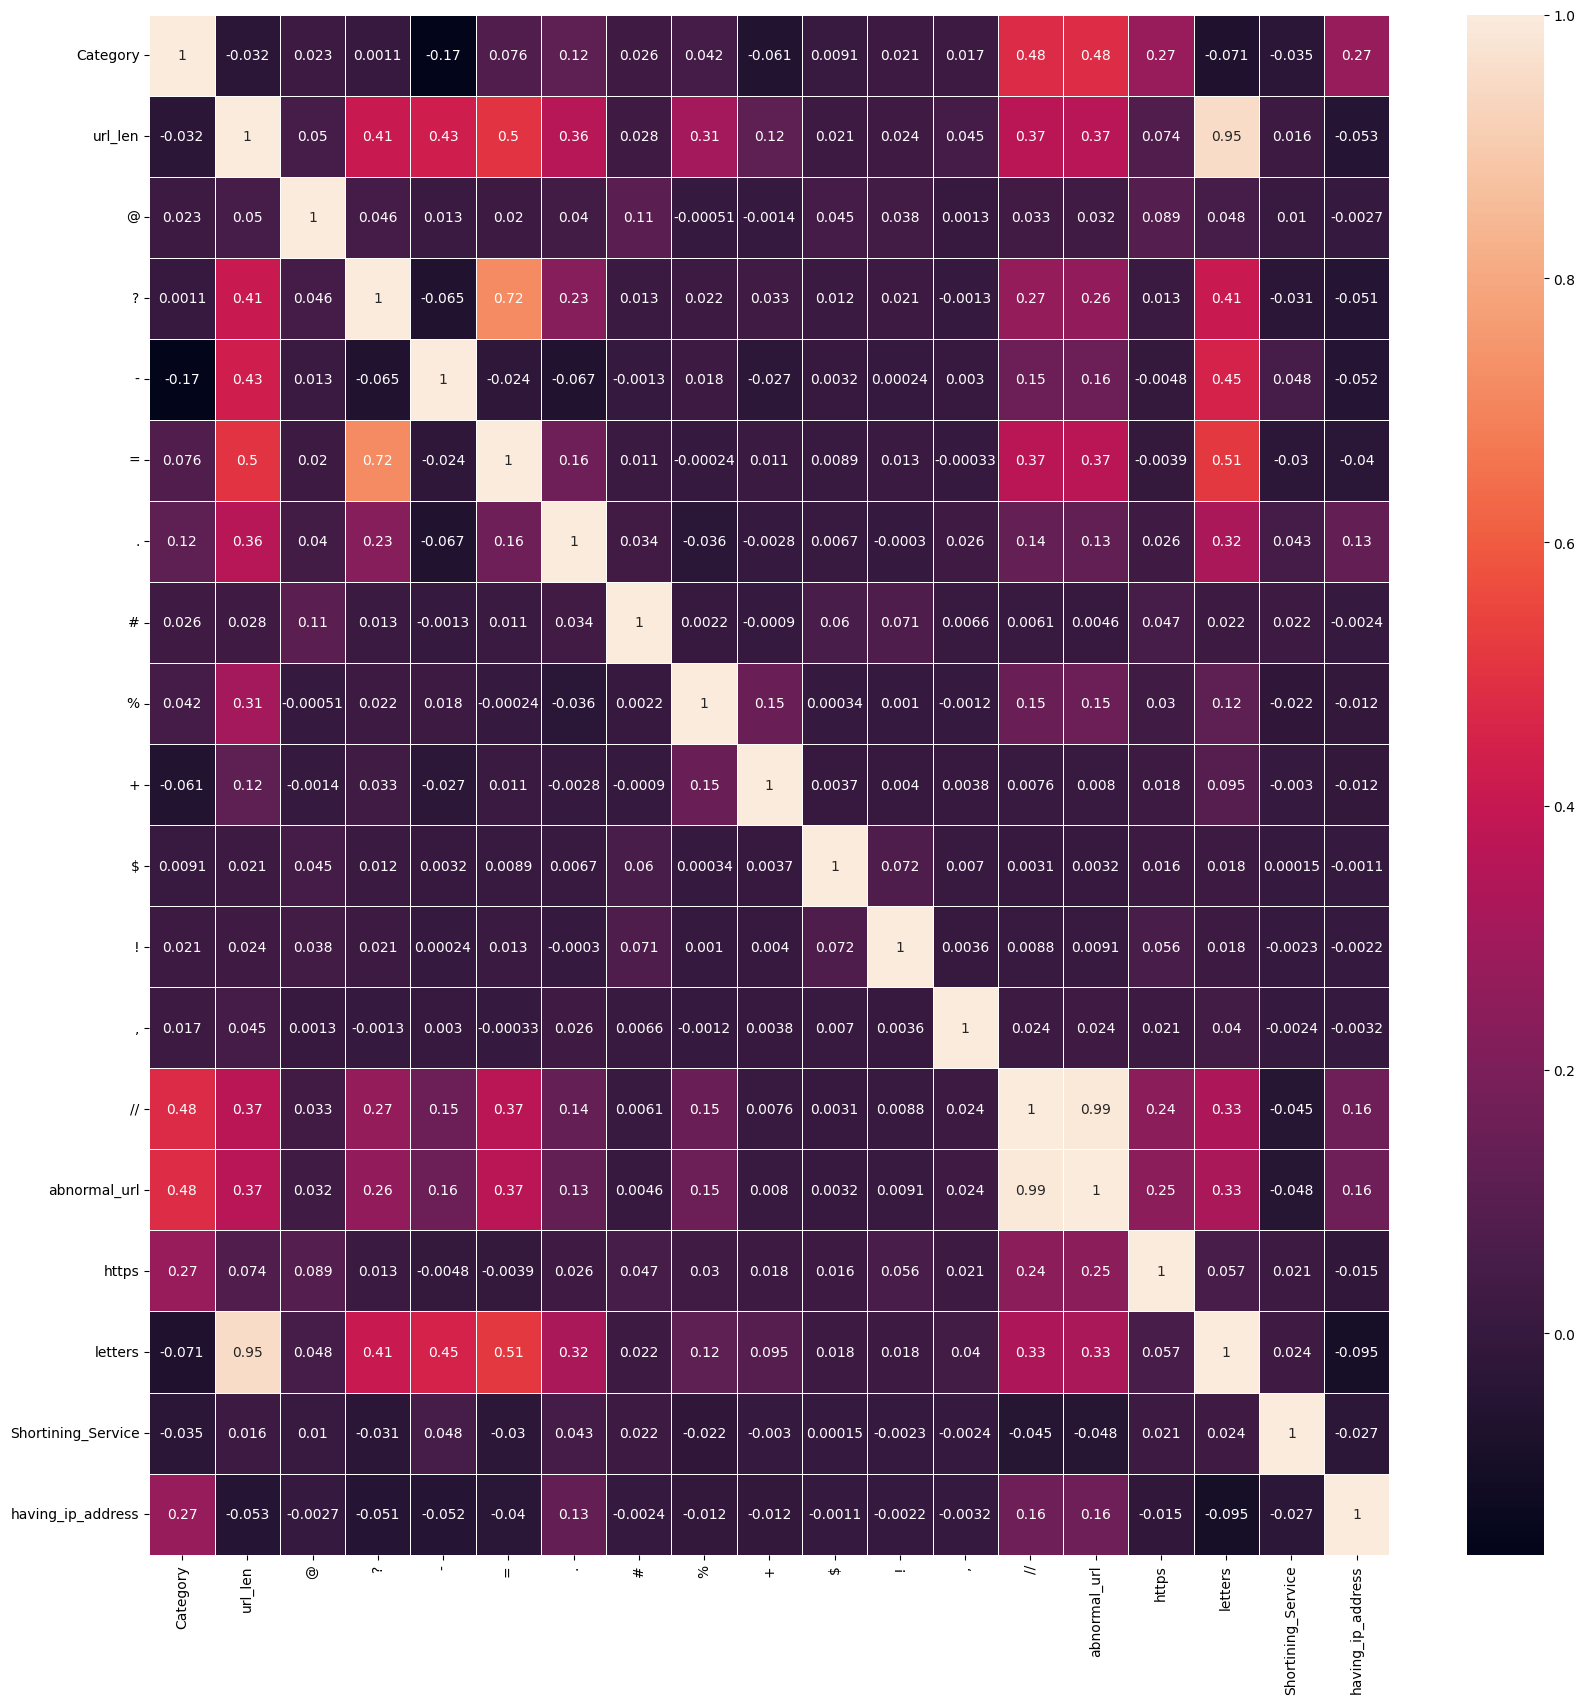

In [ ]:
#Ploting Heatmap Chart
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, linewidths=0.5) # Added annot=True to display correlation coefficients
plt.show()


In [ ]:
#x = df.drop(['url','type','category','domain'],axis=1) # type code
x = df.drop(['Category'],axis=1)
y = df['Category']

In [ ]:
df


,Category,url_len,@,?,-,=,.,#,%,+,$,!,",",//,abnormal_url,https,letters,Shortining_Service,having_ip_address
0,2,16,0,0,1,0,2,0,0,0,0,0,0,0,0,0,13,0,0
1,0,35,0,0,0,0,2,0,0,0,0,0,0,0,0,0,29,0,0
2,0,31,0,0,0,0,2,0,0,0,0,0,0,0,0,0,25,0,0
3,1,84,0,1,1,4,2,0,0,0,0,0,0,1,1,0,60,0,0
4,1,235,0,1,1,3,2,0,0,0,0,0,0,1,1,0,199,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,2,39,0,0,0,0,3,0,0,0,0,0,0,0,0,0,21,0,0
651187,2,44,0,0,2,0,2,0,0,0,0,0,0,0,0,0,29,1,0
651188,2,38,0,0,0,0,1,0,0,0,0,0,0,0,0,0,30,1,0
651189,2,45,0,0,0,0,2,0,0,0,0,0,0,0,0,0,36,0,0


In [ ]:
# Splitting Data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
x_train

,url_len,@,?,-,=,.,#,%,+,$,!,",",//,abnormal_url,https,letters,Shortining_Service,having_ip_address
510482,31,0,0,1,0,1,0,0,0,0,0,0,0,0,0,26,0,0
194358,86,0,0,7,0,1,0,0,0,0,0,0,1,1,0,65,0,0
611258,90,0,1,0,2,2,0,0,0,0,0,0,0,0,0,73,0,0
417382,39,0,0,0,0,1,0,0,0,0,0,0,0,0,0,34,0,0
225565,80,0,0,8,0,1,0,0,0,0,0,0,0,0,0,69,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84434,41,0,0,0,0,2,0,0,0,0,0,0,0,0,0,29,0,0
437782,21,0,0,0,0,2,0,0,0,0,0,0,0,0,0,18,0,0
620104,44,0,0,0,0,2,0,0,0,0,0,0,0,0,0,27,0,0
203245,56,0,0,2,0,3,0,0,0,0,0,0,0,0,0,48,0,0


In [ ]:
x_test

,url_len,@,?,-,=,.,#,%,+,$,!,",",//,abnormal_url,https,letters,Shortining_Service,having_ip_address
238731,96,0,1,1,5,2,0,0,0,0,0,0,1,1,0,76,0,0
309364,84,0,1,1,3,2,0,0,0,0,0,0,0,0,0,59,0,0
170638,83,0,0,13,0,2,0,0,0,0,0,0,1,1,0,30,0,0
246063,14,0,0,0,0,1,0,0,0,0,0,0,0,0,0,12,0,0
466287,39,0,0,4,0,1,0,0,0,0,0,0,0,0,0,27,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348509,78,0,1,1,4,2,0,0,0,0,0,0,1,1,0,58,0,0
500295,28,0,0,0,0,2,0,0,0,0,0,0,0,0,0,25,0,0
53597,82,0,1,0,4,2,0,0,0,0,0,0,1,1,0,63,0,0
26012,26,0,0,0,0,1,0,0,1,0,0,0,0,0,0,22,0,0


In [ ]:
y_train

,Category
510482,0
194358,0
611258,2
417382,0
225565,0
...,...
84434,0
437782,0
620104,2
203245,0


In [ ]:
y_test

,Category
238731,1
309364,0
170638,1
246063,0
466287,0
...,...
348509,1
500295,0
53597,1
26012,0


In [ ]:
# Importing plot_confusion_matrix and plot_roc_curve

#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay

##########################################
######-Model => <class 'sklearn.tree._classes.DecisionTreeClassifier'> 
Test Accuracy : : 89.87%  
                  Classification_report ]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     85565
           1       0.91      0.95      0.93     19319
           2       0.80      0.49      0.61     18805
           3       0.94      0.90      0.92      6550

    accuracy                           0.90    130239
   macro avg       0.89      0.83      0.85    130239
weighted avg       0.89      0.90      0.89    130239

               Confusion_matrix 


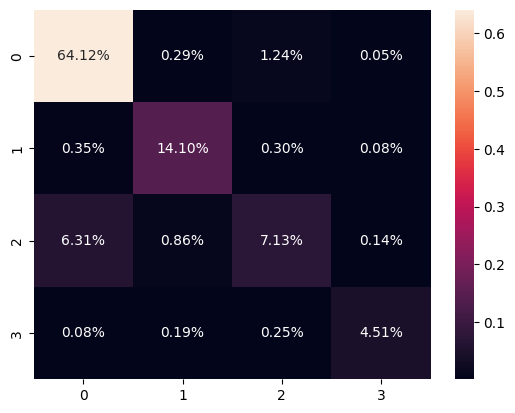

###################- End -###################
##########################################
######-Model => <class 'sklearn.ensemble._forest.RandomForestClassifier'> 
Test Accuracy : : 90.28%  
                  Classification_report ]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     85565
           1       0.92      0.95      0.94     19319
           2       0.81      0.51      0.63     18805
           3       0.95      0.90      0.93      6550

    accuracy                           0.90    130239
   macro avg       0.90      0.84      0.86    130239
weighted avg       0.90      0.90      0.89    130239

               Confusion_matrix 


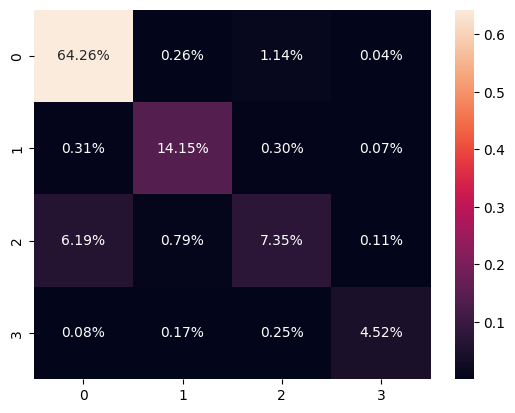

###################- End -###################
##########################################
######-Model => <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'> 
Test Accuracy : : 76.95%  
                  Classification_report ]
              precision    recall  f1-score   support

           0       0.85      0.97      0.90     85565
           1       0.68      0.66      0.67     19319
           2       0.31      0.09      0.14     18805
           3       0.36      0.44      0.40      6550

    accuracy                           0.77    130239
   macro avg       0.55      0.54      0.53    130239
weighted avg       0.72      0.77      0.73    130239

               Confusion_matrix 


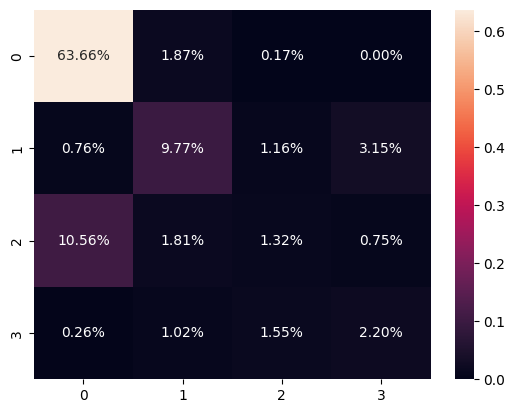

###################- End -###################
##########################################
######-Model => <class 'sklearn.neighbors._classification.KNeighborsClassifier'> 
Test Accuracy : : 87.69%  
                  Classification_report ]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92     85565
           1       0.88      0.94      0.91     19319
           2       0.68      0.49      0.57     18805
           3       0.94      0.87      0.90      6550

    accuracy                           0.88    130239
   macro avg       0.85      0.81      0.83    130239
weighted avg       0.87      0.88      0.87    130239

               Confusion_matrix 


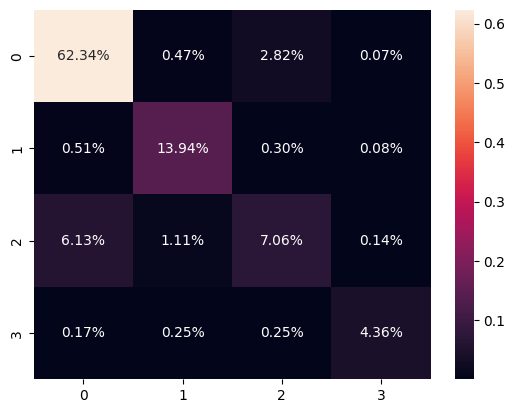

###################- End -###################
##########################################
######-Model => <class 'sklearn.ensemble._forest.ExtraTreesClassifier'> 
Test Accuracy : : 90.29%  
                  Classification_report ]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     85565
           1       0.92      0.96      0.94     19319
           2       0.82      0.50      0.62     18805
           3       0.96      0.90      0.93      6550

    accuracy                           0.90    130239
   macro avg       0.90      0.83      0.86    130239
weighted avg       0.90      0.90      0.89    130239

               Confusion_matrix 


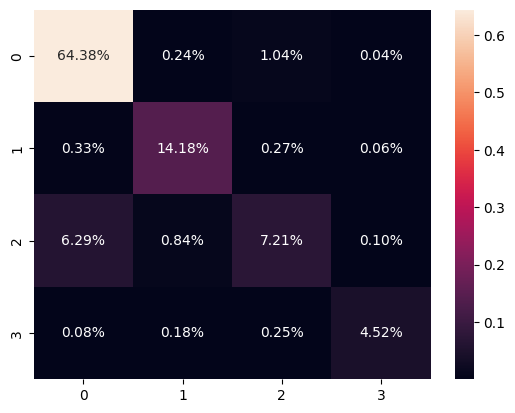

###################- End -###################


In [ ]:
models = [DecisionTreeClassifier, RandomForestClassifier, AdaBoostClassifier, KNeighborsClassifier, ExtraTreesClassifier]

accuracy_test=[]

for m in models:
  print('##########################################')

  print('######-Model =>\033[07m {} \033[0m'.format(m))

  model_ = m()

  model_.fit(x_train, y_train)

  pred =model_.predict(x_test)

  acc = accuracy_score(pred, y_test)

  accuracy_test.append(acc)

  print('Test Accuracy :\033[32m :\033[01m {:.2f}% \033[30m \033[0m'.format(acc*100))

  print('\033[01m                  Classification_report \033[0m]')

  print(classification_report(y_test, pred))

  print('\033[01m               Confusion_matrix \033[0m')

  cf_matrix = confusion_matrix(y_test,pred)

  plot = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt= '0.2%')

  plt.show()

  print('\033[31m###################- End -###################\033[0m')

In [ ]:
output = pd.DataFrame({"Model":['Decision Tree Classifier', 'Random Forest Classifier','AdaBoost Classifier', 'KNeighbors Classifier', 'Extra Trees Classifier'], "Accuracy":accuracy_test})


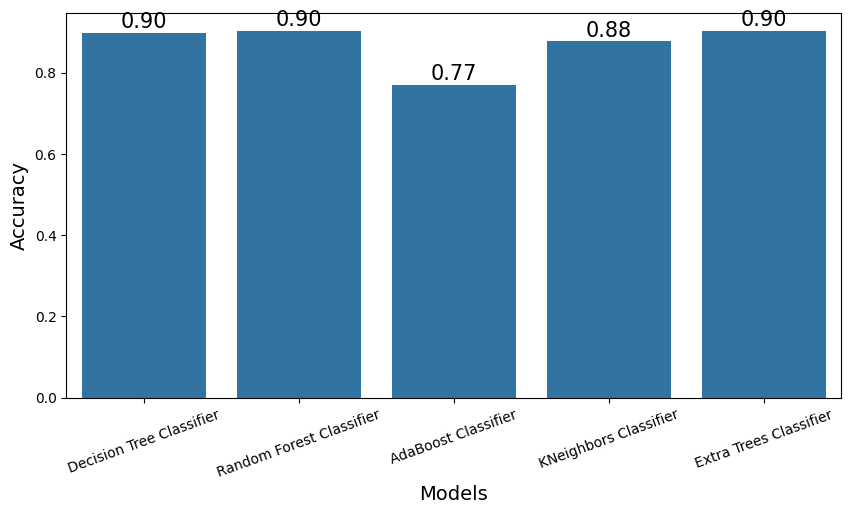

In [ ]:
plt.figure(figsize=(10, 5))

plots = sns.barplot (x='Model', y='Accuracy', data=output)
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.2f'),
                (bar.get_x() + bar.get_width() / 2,bar.get_height()), ha='center', va='center',
                 size=15, xytext=(0, 8),textcoords= 'offset points')
plt.xlabel("Models", size=14)

plt.xticks(rotation=20);

plt.ylabel("Accuracy", size=14)

plt.show()

##########################################
######-Model => <class 'sklearn.ensemble._forest.ExtraTreesClassifier'> 
Test Accuracy : : 90.28%  
                  Classification_report ]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     85565
           1       0.92      0.96      0.94     19319
           2       0.82      0.50      0.62     18805
           3       0.96      0.90      0.93      6550

    accuracy                           0.90    130239
   macro avg       0.90      0.83      0.86    130239
weighted avg       0.90      0.90      0.89    130239

               Confusion_matrix 


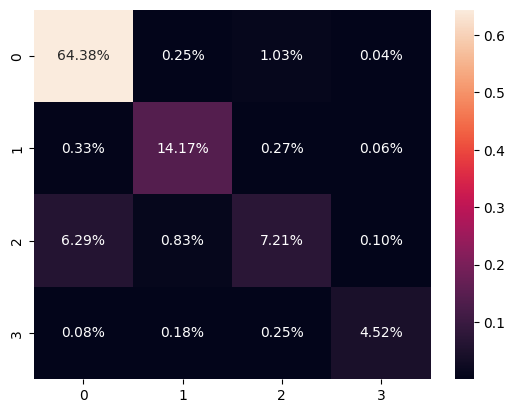

###################- End -###################


In [ ]:
models = [ExtraTreesClassifier]

accuracy_test=[]

for m in models:
  print('##########################################')

  print('######-Model =>\033[07m {} \033[0m'.format(m))

  model_ = m()

  model_.fit(x_train, y_train)

  pred =model_.predict(x_test)

  acc = accuracy_score(pred, y_test)

  accuracy_test.append(acc)

  print('Test Accuracy :\033[32m :\033[01m {:.2f}% \033[30m \033[0m'.format(acc*100))

  print('\033[01m                  Classification_report \033[0m]')

  print(classification_report(y_test, pred))

  print('\033[01m               Confusion_matrix \033[0m')

  cf_matrix = confusion_matrix(y_test,pred)

  plot = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt= '0.2%')

  plt.show()

  print('\033[31m###################- End -###################\033[0m')


In [ ]:
import joblib  # for Scikit-learn
joblib.dump(model_, 'malicious_url_model.pkl')

['malicious_url_model.pkl']

In [ ]:
a=x_test.sample()
a

In [ ]:
a = "https://www.amazon.in/Himajal-Smart-Alkaline-Purifier-White/dp/B09GYK591B/?_encoding=UTF8&pd_rd_w=KHOG7&content-id=amzn1.sym.ad657a10-bb6e-42b7-a1c6-e3dc05997c26&pf_rd_p=ad657a10-bb6e-42b7-a1c6-e3dc05997c26&pf_rd_r=SPX2NQ3MKZ8MWHNB90GA&pd_rd_wg=hVvdt&pd_rd_r=d6a102d6-b736-4940-95ff-8216ee0df0b3&ref_=pd_hp_d_btf_LPDEALS"

# Convert into a DataFrame
dfr = pd.DataFrame([a], columns=["url"])

dfr

,url
0,https://www.amazon.in/Himajal-Smart-Alkaline-P...


In [ ]:
#a = input("Enter URL to Check")
# Convert into a DataFrame
a =pd.read_csv('Test1.csv')

In [ ]:
a

,url
0,wn.com/American_Football_League
1,reviews.creditkarma.com/credit-unions/communit...
2,r1ma.blogspot.com/2011/11/anais-pouliot-in-div...
3,songlyrics.com/arrogant-worms-the/the-happy-ha...
4,northjersey.com/news/022411_Report_recommends_...
5,flixster.com/videos
6,en.wikipedia.org/wiki/Francine_Lalonde
7,shgresources.com/ca/timeline/
8,http://www.masrealestate.it/index.php?option=c...
9,lemonamiga.com/?game_id=352


In [ ]:
#a = input("Enter URL to Check")
# Convert into a DataFrame
dfr =pd.read_csv('Test1.csv')

#dfr = pd.DataFrame([a], columns=["url"])

dfr
dfr['url_len'] = dfr['url'].apply(lambda x:len(str(x)))

#dfr['domain'] = dfr['url'].apply(lambda x: process_tld(x) )
for a in feature:
  dfr[a] = dfr['url'].apply(lambda i: i.count(a))

dfr['abnormal_url'] = dfr['url'].apply(lambda i: abnormal_url(i))

dfr['https'] = dfr['url'].apply(lambda i: httpSecure(i))

dfr['letters']= dfr['url'].apply(lambda i: letter_count(i))


dfr['Shortining_Service']= dfr['url'].apply(lambda x: Shortining_Service(x))


dfr['having_ip_address']= dfr['url'].apply(lambda i: having_ip_address(i))
dfra = dfr.drop(['url'], axis=1)
dfra
k=model_.predict(dfra)
k

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 2,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0])

In [ ]:
rem = {2:"phishing",3:"malware",0:"benign",1:"defacement"}
for i in k:
  j=int(i)
  print(rem[i])

benign
benign
benign
benign
benign
benign
benign
benign
defacement
benign
benign
benign
benign
benign
benign
phishing
defacement
benign
benign
benign
defacement
phishing
defacement
benign
benign
defacement
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
defacement
benign
benign
defacement
benign
defacement
benign
benign
benign


In [ ]:
k=int(k)
#print(k)
rem = {2:"phishing",3:"malware",0:"benign",1:"defacement"}
rem[k]

In [ ]:
k=model_.predict(dfra)
k=int(k)
print(k)
rem = {2:"phishing",3:"malware",0:"benign",1:"defacement"}
rem[k]


2


<ipython-input-62-a12eae2a8f2d>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  k=int(k)


In [ ]:
rem = {2:"phishing",3:"malware",0:"benign",1:"defacement"}
rem[k]

'phishing'

In [ ]:

rem = {2:"phishing",3:"malware",0:"benign",1:"defacement"}
rem[2]

'phishing'

In [ ]:
import joblib

# Load the trained model
model = joblib.load('malicious_url_model.pkl')

# Take URL input from the user
url = input("Enter a URL to check: ")

# Predict using the model
prediction = model.predict([url])  # Ensure this matches your training input format

# Print the result
result = "Malicious" if prediction[0] == 1 else "Safe"
print(f"The URL '{url}' is predicted as: {result}")
